# WineQuality

### Load the data

1. Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx, which you can find in the Data Science repository on Github: https://github.com/datsoftlyngby/dat2024spring-bi/tree/main/data.

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import XlsxLoader as xl

In [262]:
df_red, df_white = xl.load_paths(["./data/winequality-red.xlsx", "./data/winequality-white.xlsx"])

In [263]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [264]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [265]:
dfr = pd.read_excel("./data/winequality-red.xlsx", index_col=None, na_values=["NA"])
dfw = pd.read_excel("./data/winequality-white.xlsx", index_col=None, na_values=["NA"])

2. Clean the data in both files.

In [266]:
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [267]:
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


3. Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.

In [268]:
dfr['wine_type'] = 'red'
dfw['wine_type'] = 'white'

combined_df = pd.concat([dfr, dfw])

# Reset index
combined_df.reset_index(drop=True, inplace=True)

In [269]:
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [270]:
combined_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [271]:
combined_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4558,7.3,0.40,0.26,5.45,0.016,26.0,90.0,0.98951,2.84,0.54,13.2,7,white
4269,5.9,0.34,0.31,2.00,0.030,38.0,142.0,0.98892,3.40,0.41,12.9,7,white
4166,6.6,0.24,0.28,1.80,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,5,white
4187,6.8,0.18,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white
1980,7.2,0.28,0.26,12.50,0.046,48.0,179.0,0.99750,3.10,0.52,9.0,6,white
1024,7.7,0.58,0.01,1.80,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7,red
4603,6.3,0.18,0.36,1.20,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,6,white
5464,6.0,0.31,0.38,4.80,0.040,41.0,101.0,0.98968,3.24,0.56,13.1,6,white
6373,7.1,0.24,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,4,white
6342,6.0,0.14,0.37,1.20,0.032,63.0,148.0,0.99185,3.32,0.44,11.2,5,white


### Explore the data

4. Explore the features of the original and the new files:
 - number of rows and columns
 - type of data in each column


In [272]:
combined_df.shape

(6497, 13)

In [273]:
combined_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

5. Calculate the descriptive statistics of the numeric data. Is the data normally distributed?


In [274]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


6. Plot diagrams that visualize the differences in red and white wine samples. Use it as a support for
answering the following questions:
a. what exactly is shown on the diagrams?
b. after seeing it, can you tell which type of wine has higher average quality?
c. which type of wine has higher average level of alcohol?
d. which one has higher average quantity of residual sugar? 

7. Which other questions might be of interest for the wine consumers or distributers?



8. Split the aggregated data into five subsets by binning the attribute pH. Identify the subset with
the highest density? What if you split the data in ten subsets?


9. Create a heat map or a correlation matrix of all data and investigate it. Can you tell which vine
attribute has the biggest influence on the wine quality? Which has the lowest?
Do you get the same results when you analyze the red and white wine data sets separately?


### Prepare the data for further analysis

10. Explore the feature ‘residual sugar’. Is there any outlier (a value much different from the rest)?
On which row is it found? Remove that row.

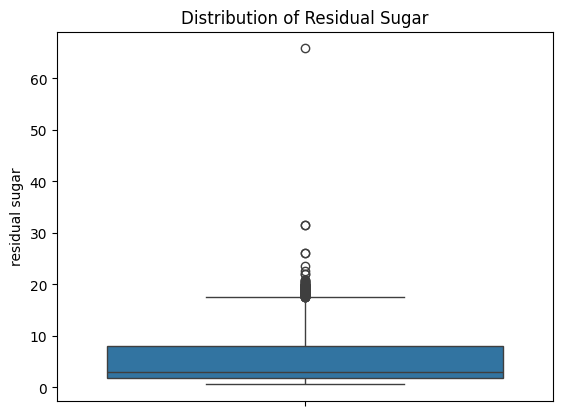

In [275]:
# Explore and handle outliers in 'residual sugar'
sns.boxplot(data=combined_df['residual sugar'])
plt.title('Distribution of Residual Sugar')
plt.show()

# Identify and remove outlier
outlier_index = combined_df[combined_df['residual sugar'] > 40].index
combined_df.drop(outlier_index, inplace=True)

11. Identify the attribute with the lowest correlation to the wine quality and remove it.



In [276]:
test_df = combined_df.drop(['wine_type'], axis=1)
test_corr = test_df.corr()
test_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.218991,0.324400,-0.114289,0.298170,-0.282687,-0.329129,0.465778,-0.252801,0.299525,-0.095531,-0.076759
volatile acidity,0.218991,1.000000,-0.379645,-0.206227,0.377251,-0.352250,-0.415415,0.267481,0.261144,0.225630,-0.038278,-0.266118
citric acid,0.324400,-0.379645,1.000000,0.140461,0.038857,0.133559,0.195074,0.093359,-0.330250,0.055900,-0.010799,0.085495
residual sugar,-0.114289,-0.206227,0.140461,1.000000,-0.131585,0.410517,0.500212,0.539417,-0.272828,-0.190401,-0.365984,-0.037859
chlorides,0.298170,0.377251,0.038857,-0.131585,1.000000,-0.194973,-0.279711,0.367682,0.044629,0.395552,-0.257021,-0.200687
free sulfur dioxide,-0.282687,-0.352250,0.133559,0.410517,-0.194973,1.000000,0.721211,0.029099,-0.145676,-0.188289,-0.179677,0.055511
total sulfur dioxide,-0.329129,-0.415415,0.195074,0.500212,-0.279711,0.721211,1.000000,0.031143,-0.238574,-0.275893,-0.265895,-0.041413
density,0.465778,0.267481,0.093359,0.539417,0.367682,0.029099,0.031143,1.000000,0.009421,0.261503,-0.700972,-0.311608
pH,-0.252801,0.261144,-0.330250,-0.272828,0.044629,-0.145676,-0.238574,0.009421,1.000000,0.191982,0.121102,0.019473
sulphates,0.299525,0.225630,0.055900,-0.190401,0.395552,-0.188289,-0.275893,0.261503,0.191982,1.000000,-0.003196,0.038455


In [277]:
# Exclude non-numeric columns before calculating correlation
numeric_df = combined_df.select_dtypes(include=['number'])

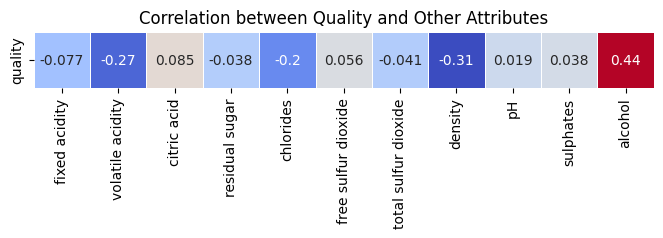

Attribute with the correlation closest to 0: pH


In [278]:
# Calculate the correlation between each attribute and drop the wine_type column as it can skew the results
wines_corr = numeric_df.corr()

# Keep only the correlation values related to 'quality'
quality_corr = wines_corr['quality'].drop('quality')  # Exclude the correlation with itself

# Plot heatmap for the correlation between 'quality' and other attributes
plt.figure(figsize=(8, 6))
sns.heatmap(quality_corr.to_frame().T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, square=True)
plt.title('Correlation between Quality and Other Attributes')
plt.show()

# Find the attribute with the correlation closest to 0
closest_to_zero = quality_corr.abs().idxmin()

print("Attribute with the correlation closest to 0:", closest_to_zero)

In [279]:
wines_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.218991,0.324400,-0.114289,0.298170,-0.282687,-0.329129,0.465778,-0.252801,0.299525,-0.095531,-0.076759
volatile acidity,0.218991,1.000000,-0.379645,-0.206227,0.377251,-0.352250,-0.415415,0.267481,0.261144,0.225630,-0.038278,-0.266118
citric acid,0.324400,-0.379645,1.000000,0.140461,0.038857,0.133559,0.195074,0.093359,-0.330250,0.055900,-0.010799,0.085495
residual sugar,-0.114289,-0.206227,0.140461,1.000000,-0.131585,0.410517,0.500212,0.539417,-0.272828,-0.190401,-0.365984,-0.037859
chlorides,0.298170,0.377251,0.038857,-0.131585,1.000000,-0.194973,-0.279711,0.367682,0.044629,0.395552,-0.257021,-0.200687
free sulfur dioxide,-0.282687,-0.352250,0.133559,0.410517,-0.194973,1.000000,0.721211,0.029099,-0.145676,-0.188289,-0.179677,0.055511
total sulfur dioxide,-0.329129,-0.415415,0.195074,0.500212,-0.279711,0.721211,1.000000,0.031143,-0.238574,-0.275893,-0.265895,-0.041413
density,0.465778,0.267481,0.093359,0.539417,0.367682,0.029099,0.031143,1.000000,0.009421,0.261503,-0.700972,-0.311608
pH,-0.252801,0.261144,-0.330250,-0.272828,0.044629,-0.145676,-0.238574,0.009421,1.000000,0.191982,0.121102,0.019473
sulphates,0.299525,0.225630,0.055900,-0.190401,0.395552,-0.188289,-0.275893,0.261503,0.191982,1.000000,-0.003196,0.038455


In [280]:
combined_df.drop(closest_to_zero, axis=1, inplace=True)
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,red


12. Transform the categorical data into numeric.


In [281]:
# Transform 'wine_type' to binary
new_df = combined_df.copy()
new_df['wine_type'] = (new_df['wine_type'] == 'red').astype(int)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,0.38,12.8,7,0


13. Try to reduce the number of features of the aggregated data set by applying principal
component analysis (PCA). What is the optimal number of components?


In [282]:
new_df.drop('wine_type', axis=1, inplace=True)

In [283]:
VAL = new_df.values
VAL

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

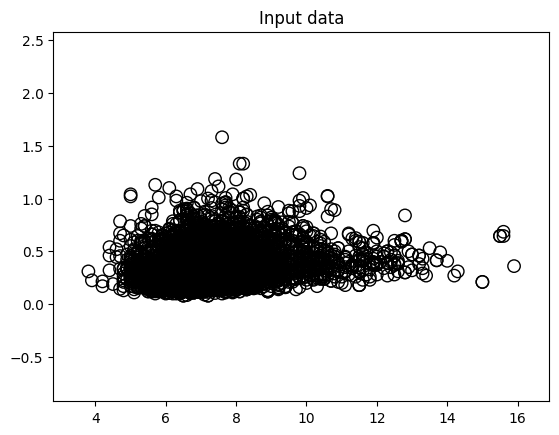

In [284]:
# Plot the data
plt.figure()
plt.title('Input data')

# calculate the range of coordinates
x_min, x_max = VAL[:, 0].min() - 1, VAL[:, 0].max() + 1
y_min, y_max = VAL[:, 1].min() - 1, VAL[:, 1].max() + 1

# plot coordinates
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the points
plt.scatter(VAL[:,0], VAL[:,1], color='black', s=80, marker='o', facecolors='none')

plt.show()

In [285]:
from sklearn import preprocessing as prep

# Method L1: Least Absolute Deviation
# if we add the normalized values in each row, the sum of the new values is always 1
nl1 = prep.normalize(VAL, norm='l1')
nl1

array([[0.10417576, 0.00985446, 0.        , ..., 0.00788357, 0.13233137,
        0.07038903],
       [0.06507875, 0.00734222, 0.        , ..., 0.00567353, 0.0817656 ,
        0.04171714],
       [0.08088014, 0.00788063, 0.00041477, ..., 0.00674001, 0.10161864,
        0.05184624],
       ...,
       [0.03915107, 0.00144558, 0.00114442, ..., 0.00277069, 0.05661848,
        0.03613945],
       [0.03472646, 0.00183103, 0.00189417, ..., 0.00239928, 0.08081793,
        0.04419731],
       [0.04095021, 0.00143326, 0.00259351, ..., 0.00218401, 0.0805354 ,
        0.04095021]])

In [286]:
# Method L2: Least Squared Deviation 
# if we square each element in the vector (row), and summed them, the sum would equal 1
nl2 = prep.normalize(VAL, norm='l2')
nl2

array([[0.19429768, 0.01837951, 0.        , ..., 0.01470361, 0.24681057,
        0.13128222],
       [0.10709195, 0.01208217, 0.        , ..., 0.00933622, 0.13455142,
        0.06864868],
       [0.13516403, 0.01316983, 0.00069315, ..., 0.01126367, 0.16982147,
        0.08664361],
       ...,
       [0.05617169, 0.00207403, 0.00164194, ..., 0.00397523, 0.08123291,
        0.05185079],
       [0.04871723, 0.00256873, 0.0026573 , ..., 0.00336592, 0.11337829,
        0.06200375],
       [0.05911646, 0.00206908, 0.00374404, ..., 0.00315288, 0.11626236,
        0.05911646]])

In [287]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
VAL = sc.fit_transform(VAL)  
VAL

array([[ 0.14253396,  2.19168464, -2.19299869, ...,  0.19326305,
        -0.91531008, -0.93712859],
       [ 0.4510775 ,  3.2862188 , -2.19299869, ...,  0.99975348,
        -0.57991336, -0.93712859],
       [ 0.4510775 ,  2.55652936, -1.91766056, ...,  0.79813087,
        -0.57991336, -0.93712859],
       ...,
       [-0.55168901, -0.6054582 , -0.88514257, ..., -0.47881231,
        -0.91531008,  0.20801575],
       [-1.32304786, -0.30142093, -0.12796272, ..., -1.01647259,
         1.93556199,  1.35316009],
       [-0.93736844, -0.78788056,  0.42271354, ..., -1.41971781,
         1.09707021,  0.20801575]])

In [288]:
np.mean(VAL), np.std(VAL)

(2.6140208572634227e-15, 1.0)

In [289]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca_data = pca.fit_transform(VAL)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
pca_data

[0.27013592 0.2374319  0.13532469 0.0832143  0.07535034 0.05175438
 0.05019033 0.0414568  0.02791183 0.02171202 0.00551749]
[2.97195258 2.612153   1.48880083 0.91549823 0.82898134 0.56938579
 0.55217866 0.45609496 0.30707741 0.23886902 0.06070179]


array([[ 3.02354281e+00,  4.51979795e-01, -2.54247504e+00, ...,
         2.03598124e-01,  2.18952758e-01, -1.90624487e-01],
       [ 3.34254257e+00,  7.42071674e-01, -2.48539094e+00, ...,
         2.76950834e-01,  3.16175533e-03,  2.89848763e-01],
       [ 3.26827344e+00,  5.38464596e-01, -2.11641117e+00, ...,
         1.62730929e-01, -6.39013887e-02,  9.50066476e-02],
       ...,
       [-4.83813528e-01, -7.38038159e-01, -8.84392989e-01, ...,
         2.69276521e-01,  5.42726599e-02,  2.28662540e-01],
       [-1.19469085e+00, -3.55279668e+00, -1.29147714e-01, ...,
         3.84533869e-01, -2.30645321e-01, -1.72671953e-01],
       [-1.20135435e+00, -2.63099581e+00, -1.04235930e-01, ...,
         2.04435012e-01,  1.87235095e-01, -6.37409435e-02]])

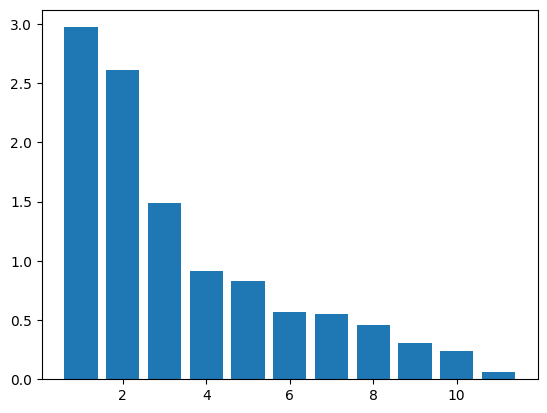

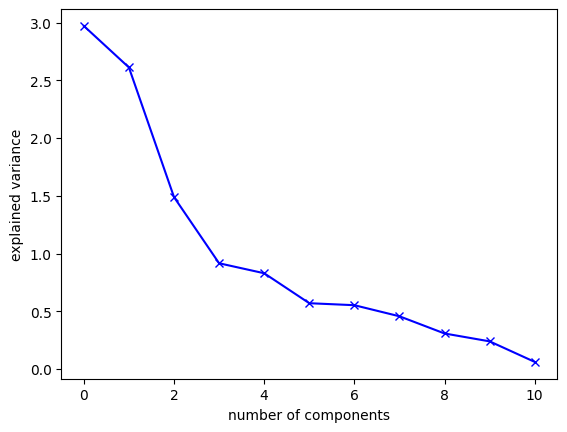

In [290]:
plt.bar(range(1, 11+1), pca.explained_variance_)
plt.show()

plt.plot(pca.explained_variance_, 'bx-')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [291]:
pca2 = PCA(n_components=5)
pca_data2 = pca2.fit_transform(VAL)
pca_data2

array([[ 3.02354281,  0.45197979, -2.54247504,  0.09184067, -0.64089529],
       [ 3.34254257,  0.74207167, -2.48539094,  1.1843386 , -0.14178665],
       [ 3.26827344,  0.5384646 , -2.11641117,  0.61053671, -0.24670468],
       ...,
       [-0.48381353, -0.73803816, -0.88439299, -0.17726569,  0.36230883],
       [-1.19469085, -3.55279668, -0.12914771, -0.11390663, -0.19128022],
       [-1.20135435, -2.63099581, -0.10423593, -1.29049382,  0.42119478]])

In [292]:
pcadf = pd.DataFrame(data = pca_data2, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pcadf

,PC1,PC2,PC3,PC4,PC5
0,3.023543,0.451980,-2.542475,0.091841,-0.640895
1,3.342543,0.742072,-2.485391,1.184339,-0.141787
2,3.268273,0.538465,-2.116411,0.610537,-0.246705
3,2.135673,1.055173,2.695558,-1.466936,-0.221837
4,3.023543,0.451980,-2.542475,0.091841,-0.640895
...,...,...,...,...,...
6491,-0.458442,-1.840366,-0.147273,-0.239270,0.434776
6492,-1.524397,1.282067,-0.586340,-0.128918,0.771760
6493,-0.483814,-0.738038,-0.884393,-0.177266,0.362309
6494,-1.194691,-3.552797,-0.129148,-0.113907,-0.191280


In [293]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.27013592, 0.2374319 , 0.13532469, 0.0832143 , 0.07535034,
       0.05175438, 0.05019033, 0.0414568 , 0.02791183, 0.02171202,
       0.00551749])

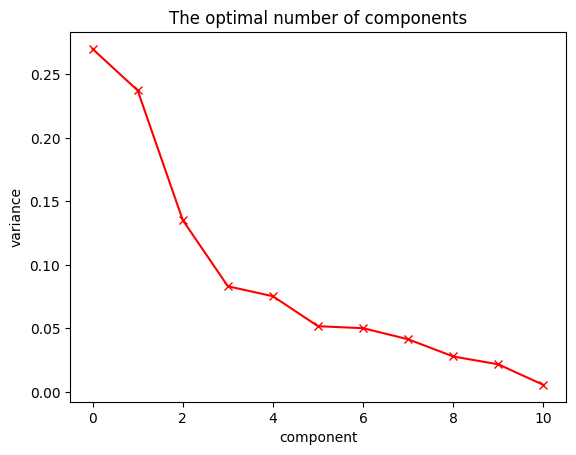

In [294]:
# Plot the explained_variance
plt.plot(explained_variance, 'rx-')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

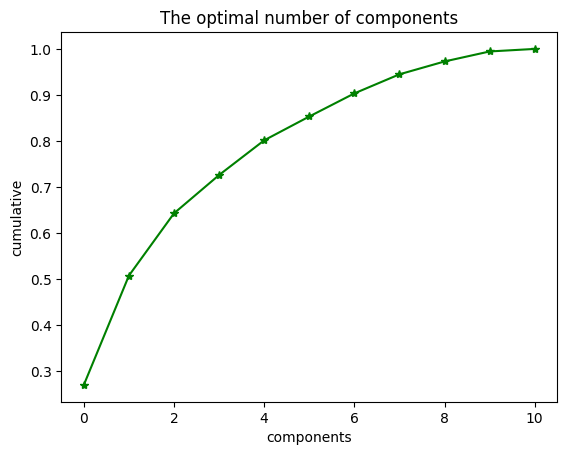

In [295]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'g*-')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

14. Print out ten random rows from the final dataset as a prove of concept.

In [296]:
combined_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,wine_type
4451,7.9,0.20,0.39,1.00,0.041,37.0,154.0,0.99093,0.43,11.9,5,white
6483,6.5,0.33,0.38,8.30,0.048,68.0,174.0,0.99492,0.50,9.6,5,white
4589,5.0,0.27,0.32,4.50,0.032,58.0,178.0,0.98956,0.31,12.6,7,white
1852,5.8,0.24,0.44,3.50,0.029,5.0,109.0,0.99130,0.43,11.7,3,white
1443,6.9,0.58,0.20,1.75,0.058,8.0,22.0,0.99322,0.49,11.7,5,red
2228,5.8,0.31,0.33,1.20,0.036,23.0,99.0,0.99160,0.60,10.5,6,white
4221,6.6,0.26,0.21,2.90,0.026,48.0,126.0,0.99089,0.38,11.3,7,white
2837,7.1,0.44,0.37,2.70,0.041,35.0,128.0,0.98960,0.43,13.5,7,white
106,7.8,0.41,0.68,1.70,0.467,18.0,69.0,0.99730,1.31,9.3,5,red
4485,6.6,0.41,0.31,1.60,0.042,18.0,101.0,0.99195,0.41,10.5,5,white
